<a href="https://colab.research.google.com/github/beverast/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/ERCOT_price_data_201944.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Terminology 

LMP (Locational Marginal Price):

RTD:

Settlement point:

Load zone:

Resource node:

### Imports and Reads

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
lmp_by_node = pd.read_csv('data/LMPs_by_resource_nodes_load_zones_and_trading_hubs.csv')
lmp_by_electrical_bus = pd.read_csv('data/LMPs_by_electrical_bus.csv')
rtd_indicative_lmp = pd.read_csv('data/RTD_indicative_LMPs_by_rn_lz_hub.csv')
settlement_prices = pd.read_csv('data/Settlement_point_prices_at_rn_lz_hub.csv')

In [0]:
lmp_by_node.shape, lmp_by_electrical_bus.shape, rtd_indicative_lmp.shape, settlement_prices.shape

((642, 4), (13290, 4), (7062, 8), (655, 7))

### `lmp_by_node` Data Cleaning 

LMP by resource nodes, load zones, and trading hubs

In [0]:
lmp_by_node.head()

,SCEDTimestamp,RepeatedHourFlag,SettlementPoint,LMP
0,04/04/2019 14:50:14,N,AEEC,27.33
1,04/04/2019 14:50:14,N,AMISTAD_ALL,27.73
2,04/04/2019 14:50:14,N,AMOCOOIL_CC1,27.76
3,04/04/2019 14:50:14,N,AMOCOOIL_CC2,27.76
4,04/04/2019 14:50:14,N,AMOCO_PUN1,27.76


In [0]:
lmp_by_node.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 4 columns):
SCEDTimestamp       642 non-null object
RepeatedHourFlag    642 non-null object
SettlementPoint     642 non-null object
LMP                 642 non-null float64
dtypes: float64(1), object(3)
memory usage: 20.1+ KB


In [0]:
# SCEDTimestamp has 1 unique value/time, and SettlementPoint is entirely unique values
lmp_by_node.describe(exclude='number')

,SCEDTimestamp,RepeatedHourFlag,SettlementPoint
count,642,642,642
unique,1,1,642
top,04/04/2019 14:50:14,N,FO_FORMOSG3
freq,642,642,1


In [0]:
# SCEDTimestamp is of dtype 'object' so I'll convert it to a dateTimeIndex
lmp_by_node['SCEDTimestamp'] = pd.to_datetime(lmp_by_node['SCEDTimestamp'], infer_datetime_format=True)
lmp_by_node['SCEDTimestamp'].head()

0   2019-04-04 14:50:14
1   2019-04-04 14:50:14
2   2019-04-04 14:50:14
3   2019-04-04 14:50:14
4   2019-04-04 14:50:14
Name: SCEDTimestamp, dtype: datetime64[ns]

In [0]:
# RepeatedHourFlag is of dtype 'object' and every observation is 'N'
# I can encode or I can drop the column
lmp_by_node['RepeatedHourFlag'] = lmp_by_node['RepeatedHourFlag'].astype('category')
lmp_by_node['RepeatedHourFlag'].cat.codes.value_counts()

0    642
dtype: int64

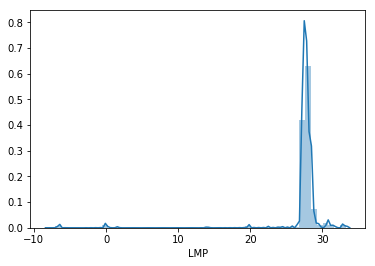

In [0]:
# Visualize the distribution of Locational Marginal Prices
sns.distplot(a=lmp_by_node['LMP']);

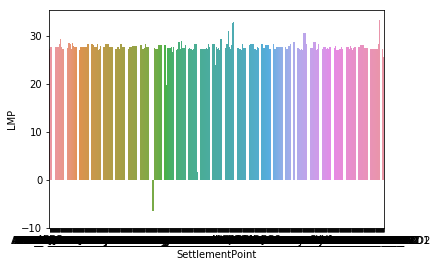

In [0]:
# At this time, what's the LMP for each resource node, load zone, and trading hub
sns.barplot(x='SettlementPoint', y='LMP', data=lmp_by_node);

### `lmp_by_electrical_bus` Data Cleaning

LMP by electrical bus

In [0]:
lmp_by_electrical_bus.head()

,SCEDTimestamp,RepeatedHourFlag,ElectricalBus,LMP
0,04/04/2019 15:00:17,N,0001,-13.44
1,04/04/2019 15:00:17,N,0001DUPV1_,28.53
2,04/04/2019 15:00:17,N,0001HWFG1,27.15
3,04/04/2019 15:00:17,N,0001VICTOR,28.56
4,04/04/2019 15:00:17,N,0001_C,28.85


In [0]:
lmp_by_electrical_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13290 entries, 0 to 13289
Data columns (total 4 columns):
SCEDTimestamp       13290 non-null object
RepeatedHourFlag    13290 non-null object
ElectricalBus       13290 non-null object
LMP                 13290 non-null float64
dtypes: float64(1), object(3)
memory usage: 415.4+ KB


In [0]:
lmp_by_electrical_bus.nunique()

SCEDTimestamp           1
RepeatedHourFlag        1
ElectricalBus       13290
LMP                   565
dtype: int64

In [0]:
# Convert 'SCEDTimestamp' to datetime object
lmp_by_electrical_bus['SCEDTimestamp'] = pd.to_datetime(lmp_by_electrical_bus['SCEDTimestamp'], infer_datetime_format=True)

In [0]:
# Convert 'RepeatedHourFlag' to category object
lmp_by_electrical_bus['RepeatedHourFlag'] = lmp_by_electrical_bus['RepeatedHourFlag'].astype('category')

In [0]:
lmp_by_electrical_bus.describe()

,LMP
count,13290.000000
mean,27.336175
std,4.798200
min,-22.170000
25%,27.230000
50%,27.780000
75%,28.200000
max,75.730000


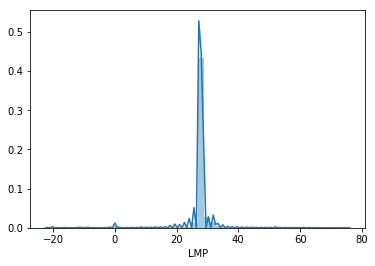

In [0]:
sns.distplot(lmp_by_electrical_bus['LMP']);

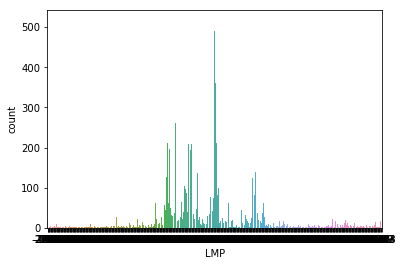

In [0]:
sns.countplot(x='LMP', data=lmp_by_electrical_bus);

### `rtd_indicative_lmp` Data Cleaning

RTD indicative LMPs by resource nodes, load zones, and trading hubs

In [0]:
rtd_indicative_lmp.head()

### `settlement_prices` Data Cleaning

Settlement prices at resource nodes, load zones, and trading hubs

In [0]:
settlement_prices.head()